<a id = 'top'></a>

<h1><center>Linear Regression Assignment</center></h1>

<h2>Objective: To predict the price of the prospective properties </h2>

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. The objective is to predict the actual value of the prospective properties and decide whether to invest in them or not. We are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

### Importing the libraries

In [562]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
import datetime
import re
import warnings
warnings.simplefilter("ignore")
from pandas.api.types import  is_object_dtype, is_numeric_dtype
pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 500)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from numpy import arange
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

### Loading the data

In [563]:
df = pd.read_csv("houseprice_prediction.csv")
dff = df.drop_duplicates().reset_index(drop=True)
df.head(4)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000


### Understanding the Data

In [564]:
print(f"Shape of the Data: {df.shape}")

Shape of the Data: (1460, 81)


In [565]:
df.info(verbose = 2, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [566]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [567]:
df.drop(columns = ['Id','YrSold','MoSold'],inplace=True)
## these variables act as record level serial numbers for the data or are variables causing data leakage and
## variables like year and month sold act as timestamp and cant be avoided

#### Understanding the categorical Variable

In [568]:
cat_vars = df.select_dtypes(include='O').columns.tolist()
df_variance_cat = pd.DataFrame()
cols_list_cat = [col for col in cat_vars]
df_variance_cat['columns'] = cols_list_cat
df_variance_cat['unique_count'] = [df[col].nunique() for col in cols_list_cat]
df_variance_cat

,columns,unique_count
0,MSZoning,5
1,Street,2
2,Alley,2
3,LotShape,4
4,LandContour,4
5,Utilities,2
6,LotConfig,5
7,LandSlope,3
8,Neighborhood,25
9,Condition1,9


In [569]:
for col in cat_vars:
    display(df[col].value_counts().reset_index().rename(columns ={'index':col,col:'value_counts'}))

,MSZoning,value_counts
0,RL,1151
1,RM,218
2,FV,65
3,RH,16
4,C (all),10


,Street,value_counts
0,Pave,1454
1,Grvl,6


,Alley,value_counts
0,Grvl,50
1,Pave,41


,LotShape,value_counts
0,Reg,925
1,IR1,484
2,IR2,41
3,IR3,10


,LandContour,value_counts
0,Lvl,1311
1,Bnk,63
2,HLS,50
3,Low,36


,Utilities,value_counts
0,AllPub,1459
1,NoSeWa,1


,LotConfig,value_counts
0,Inside,1052
1,Corner,263
2,CulDSac,94
3,FR2,47
4,FR3,4


,LandSlope,value_counts
0,Gtl,1382
1,Mod,65
2,Sev,13


,Neighborhood,value_counts
0,NAmes,225
1,CollgCr,150
2,OldTown,113
3,Edwards,100
4,Somerst,86
5,Gilbert,79
6,NridgHt,77
7,Sawyer,74
8,NWAmes,73
9,SawyerW,59


,Condition1,value_counts
0,Norm,1260
1,Feedr,81
2,Artery,48
3,RRAn,26
4,PosN,19
5,RRAe,11
6,PosA,8
7,RRNn,5
8,RRNe,2


,Condition2,value_counts
0,Norm,1445
1,Feedr,6
2,PosN,2
3,Artery,2
4,RRNn,2
5,RRAe,1
6,PosA,1
7,RRAn,1


,BldgType,value_counts
0,1Fam,1220
1,TwnhsE,114
2,Duplex,52
3,Twnhs,43
4,2fmCon,31


,HouseStyle,value_counts
0,1Story,726
1,2Story,445
2,1.5Fin,154
3,SLvl,65
4,SFoyer,37
5,1.5Unf,14
6,2.5Unf,11
7,2.5Fin,8


,RoofStyle,value_counts
0,Gable,1141
1,Hip,286
2,Flat,13
3,Gambrel,11
4,Mansard,7
5,Shed,2


,RoofMatl,value_counts
0,CompShg,1434
1,Tar&Grv,11
2,WdShngl,6
3,WdShake,5
4,Membran,1
5,Metal,1
6,Roll,1
7,ClyTile,1


,Exterior1st,value_counts
0,VinylSd,515
1,HdBoard,222
2,MetalSd,220
3,Wd Sdng,206
4,Plywood,108
5,CemntBd,61
6,BrkFace,50
7,WdShing,26
8,Stucco,25
9,AsbShng,20


,Exterior2nd,value_counts
0,VinylSd,504
1,MetalSd,214
2,HdBoard,207
3,Wd Sdng,197
4,Plywood,142
5,CmentBd,60
6,Wd Shng,38
7,Stucco,26
8,BrkFace,25
9,AsbShng,20


,MasVnrType,value_counts
0,None,864
1,BrkFace,445
2,Stone,128
3,BrkCmn,15


,ExterQual,value_counts
0,TA,906
1,Gd,488
2,Ex,52
3,Fa,14


,ExterCond,value_counts
0,TA,1282
1,Gd,146
2,Fa,28
3,Ex,3
4,Po,1


,Foundation,value_counts
0,PConc,647
1,CBlock,634
2,BrkTil,146
3,Slab,24
4,Stone,6
5,Wood,3


,BsmtQual,value_counts
0,TA,649
1,Gd,618
2,Ex,121
3,Fa,35


,BsmtCond,value_counts
0,TA,1311
1,Gd,65
2,Fa,45
3,Po,2


,BsmtExposure,value_counts
0,No,953
1,Av,221
2,Gd,134
3,Mn,114


,BsmtFinType1,value_counts
0,Unf,430
1,GLQ,418
2,ALQ,220
3,BLQ,148
4,Rec,133
5,LwQ,74


,BsmtFinType2,value_counts
0,Unf,1256
1,Rec,54
2,LwQ,46
3,BLQ,33
4,ALQ,19
5,GLQ,14


,Heating,value_counts
0,GasA,1428
1,GasW,18
2,Grav,7
3,Wall,4
4,OthW,2
5,Floor,1


,HeatingQC,value_counts
0,Ex,741
1,TA,428
2,Gd,241
3,Fa,49
4,Po,1


,CentralAir,value_counts
0,Y,1365
1,N,95


,Electrical,value_counts
0,SBrkr,1334
1,FuseA,94
2,FuseF,27
3,FuseP,3
4,Mix,1


,KitchenQual,value_counts
0,TA,735
1,Gd,586
2,Ex,100
3,Fa,39


,Functional,value_counts
0,Typ,1360
1,Min2,34
2,Min1,31
3,Mod,15
4,Maj1,14
5,Maj2,5
6,Sev,1


,FireplaceQu,value_counts
0,Gd,380
1,TA,313
2,Fa,33
3,Ex,24
4,Po,20


,GarageType,value_counts
0,Attchd,870
1,Detchd,387
2,BuiltIn,88
3,Basment,19
4,CarPort,9
5,2Types,6


,GarageFinish,value_counts
0,Unf,605
1,RFn,422
2,Fin,352


,GarageQual,value_counts
0,TA,1311
1,Fa,48
2,Gd,14
3,Po,3
4,Ex,3


,GarageCond,value_counts
0,TA,1326
1,Fa,35
2,Gd,9
3,Po,7
4,Ex,2


,PavedDrive,value_counts
0,Y,1340
1,N,90
2,P,30


,PoolQC,value_counts
0,Gd,3
1,Fa,2
2,Ex,2


,Fence,value_counts
0,MnPrv,157
1,GdPrv,59
2,GdWo,54
3,MnWw,11


,MiscFeature,value_counts
0,Shed,49
1,Gar2,2
2,Othr,2
3,TenC,1


,SaleType,value_counts
0,WD,1267
1,New,122
2,COD,43
3,ConLD,9
4,ConLw,5
5,ConLI,5
6,CWD,4
7,Oth,3
8,Con,2


,SaleCondition,value_counts
0,Normal,1198
1,Partial,125
2,Abnorml,101
3,Family,20
4,Alloca,12
5,AdjLand,4


#### Understanding the numerical Variable

In [570]:
num_vars = set(df.columns.tolist() ) - set(cat_vars)
df_variance_num = pd.DataFrame()
cols_list_num = [col for col in num_vars]
df_variance_num['columns'] = cols_list_num
df_variance_num['unique_count'] = [df[col].nunique() for col in cols_list_num]
df_variance_num

,columns,unique_count
0,MiscVal,21
1,3SsnPorch,20
2,Fireplaces,4
3,OverallCond,9
4,GarageYrBlt,97
5,BsmtHalfBath,3
6,OpenPorchSF,202
7,2ndFlrSF,417
8,BsmtUnfSF,780
9,EnclosedPorch,120


In [571]:
for i in range(df_variance_num.shape[0]):
    if df_variance_num['unique_count'][i] < 30:
        cat = df_variance_num['columns'][i]
        cat_vars.append(cat)

In [572]:
num_vars = set(df.columns.tolist() ) - set(cat_vars)
print(len(num_vars),len(cat_vars))

19 59


### Inference

- the data has 81 attributes.
- there are 1460 records at "id" level. (these columns act as serial no. for the dataset here)
- there are many nulls in the data 
- there exists 59 categorical variables in the dataset.
- vars_not_available_for_training = ['YrSold','MoSold'] these might cause data leakage
- target_var = 'SalePrice' 
- The unique values in most numerical variables justify the variance in data and if we see really less uniques values , they are actually cat variables(based on observations)
- few of the categorical variables are non-binary , hence we should explore ways of encoding.

### Dropping  variables with mostly nulls 

In [573]:
nulls = df.isnull().sum().reset_index().rename(columns = {0:"null_count"})
nulls['Percentage'] = nulls['null_count']/df.shape[0] * 100
vars1 = list(set(df.columns) - set(list(nulls[nulls.Percentage>50]['index'])))
df_v1 = df[vars1].reset_index(drop=True)

In [574]:
df_v1.shape

(1460, 74)

#### Inference
- Few of the variables had more than 50 % of null data and hence , dropped
- Imputed the num variables with mean and cat variables with mode

### Removing the outliers from target column

<AxesSubplot:xlabel='SalePrice'>

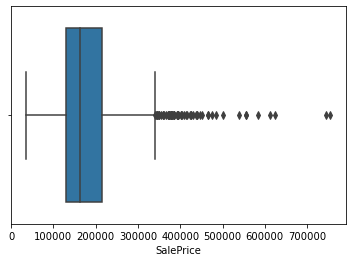

In [575]:
import seaborn as sns
sns.boxplot(df_v1['SalePrice'])

In [576]:
Q1 = np.percentile(df_v1['SalePrice'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df_v1['SalePrice'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", df.shape)
 
# Upper bound
upper = np.where(df_v1['SalePrice'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df_v1['SalePrice'] <= (Q1-1.5*IQR))
''' Removing the Outliers '''
df_v1.drop(upper[0],inplace=True)
df_v1.drop(lower[0],inplace=True)
df_v1.reset_index(drop=True)
df_v2 = df_v1

Old Shape:  (1460, 78)


In [577]:
df_v2.shape

(1399, 74)

#### Inference
- Although we are standardising the columns , removing out of bounds target values help the models to learn the pattern better & save it from learning unwanted pattern.Only removed because sample size is not reduced much
- Dropping ~60 records which show sales values out of lower & upper bounds

### Imputing nulls in categorical & numerical features

In [578]:
df_nulls = df_v2.isnull().sum().reset_index().rename(columns = {'index':'cols',0:'null_counts'})
for col in list(df_nulls[df_nulls.null_counts>0]['cols']):
    if col in num_vars:
        print(col)
df_v2['LotFrontage'].fillna(int(df['LotFrontage'].mean()), inplace=True)
df_v2['MasVnrArea'].fillna(int(df['MasVnrArea'].mean()), inplace=True)   
for col in cat_vars:
    if col in vars1:
        df_v2.loc[df[col]=='NA',col]='No'

df_v2 = df_v2.apply(lambda x: x.fillna(x.value_counts().index[0]))   
df_v2.isnull().sum().sum()

GarageYrBlt
MasVnrArea
LotFrontage


0

#### Inference
- Imputed the num variables with mean 
- For categorical variables , first replaced NA with No as NA is a label in many of the cols
- For rest of the cat variables, imputed with mode

### Understanding the correlation amongst variables

In [579]:
corr_matrix = df.corr()
corr_matrix = corr_matrix.reset_index()
corr_matrix["sale_abs"] = np.abs(corr_matrix["SalePrice"])
corr_matrix[["index","SalePrice","sale_abs"]].sort_values("sale_abs",ascending= False)

,index,SalePrice,sale_abs
34,SalePrice,1.000000,1.000000
3,OverallQual,0.790982,0.790982
15,GrLivArea,0.708624,0.708624
25,GarageCars,0.640409,0.640409
26,GarageArea,0.623431,0.623431
11,TotalBsmtSF,0.613581,0.613581
12,1stFlrSF,0.605852,0.605852
18,FullBath,0.560664,0.560664
22,TotRmsAbvGrd,0.533723,0.533723
5,YearBuilt,0.522897,0.522897


### Preparing the data for Modelling

#### Treating the categorical variables 
- We will be using pd.dummy for encoding the categorical variables.
- Using drop_first = True to limit irrelevant variables


In [580]:
dummy_vars = pd.DataFrame()
for i in cat_vars :
    if i in vars1 :
        df_temp = pd.get_dummies(df_v2[i], drop_first = True)
        df_temp = df_temp.add_prefix(str(i))
        dummy_vars= pd.concat([dummy_vars,df_temp],axis = 1)   

In [581]:
#### concatenating the dummy dfs and dropping the four categorical vars
df_v3 = pd.concat([df_v2 , dummy_vars ], axis = 1)
df_v3.drop (columns = cat_vars ,inplace = True ,errors= 'ignore')


### Checking variables which correlated significantly/multicollinearity

In [582]:
## if two variables are correlated > .7 , we see a concern of multicollinearity and are dropping in the next steps
corr_matrix = df_v3.corr()
correlated_vars = []
for i in range(len(corr_matrix.keys())):
    for j in range(i):
        if i!=j and corr_matrix.keys()[j] != 'SalePrice' and corr_matrix.keys()[i] != 'SalePrice' :
            if list(corr_matrix.loc[corr_matrix.index == corr_matrix.keys()[i]][corr_matrix.keys()[j]])[0] > .7:
                correlated_vars.append(corr_matrix.keys()[i])
                correlated_vars.append(corr_matrix.keys()[j])

In [583]:
x = pd.DataFrame(correlated_vars)

In [584]:
# list(set(x[0]))
correlated_vars = x[0].value_counts().reset_index()
list(correlated_vars[correlated_vars[0]>1]['index'])

['HouseStyle2Story',
 'KitchenAbvGr2',
 'RoofStyleShed',
 'TotRmsAbvGrd14',
 'BedroomAbvGr8',
 'Condition2RRAe',
 'BldgTypeDuplex',
 'MiscVal8300',
 'MSSubClass90',
 'LowQualFinSF515']

In [585]:
# highly_cor_vars = list(correlated_vars[correlated_vars[0]>1]['index'])
highly_cor_vars=['HouseStyle2Story',
 'KitchenAbvGr2',
 'RoofStyleShed',
 'TotRmsAbvGrd14',
 'BedroomAbvGr8',
 'Condition2RRAe',
 'BldgTypeDuplex',
 'MiscVal8300',
 'MSSubClass90',
 'LowQualFinSF515']
vars2 = list(set(df_v3.columns)- set(highly_cor_vars))
df_v4 = df_v3[vars2]

In [586]:
df_v3.shape,df_v4.shape,len(vars2)

((1399, 353), (1399, 343), 343)

In [587]:
df_v4.isnull().sum().sum()

0

#### Train-test split

In [588]:
# We specify this so that the train and test data set always have the same rows, respectively
df_train, df_test = train_test_split(df_v4, train_size = 0.7, test_size = 0.3, random_state = 100)

#### Standardisating the model variables

In [589]:
### we are using standard scaler for rescaling the numerical variables
num_vars = [x for x in num_vars if x in df_v4.columns]

cat_vars = [x for x in cat_vars if x in df_v4.columns]
scaler = MinMaxScaler()
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.transform(df_test[num_vars])

#### Diving the independent & target variable

In [590]:
y_train = df_train.pop('SalePrice')
X_train = df_train
y_test = df_test.pop('SalePrice')
X_test = df_test
X_train.shape , X_test.shape , y_train.shape , y_test.shape,df_v4.shape

((979, 342), (420, 342), (979,), (420,), (1399, 343))

In [591]:
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

### Modelling the data - Creating the baseline model

#### Basemodel with the prepared data

In [592]:
### using sklearn
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train) 
print("the fitted regression line has intercept value of -",regressor.intercept_)
# print("the fitted regression line has the following coefficient values")
# print(pd.DataFrame(list(zip(X_train.columns,regressor.coef_))))

the fitted regression line has intercept value of - -54763680703.1668


#### Predicting the target variables for train & test data

In [593]:
from sklearn.metrics import r2_score
predict_train = regressor.predict(X_train)
predict_test = regressor.predict(X_test)
print("the R2 for train dataset is ",r2_score(y_train,predict_train))
print("the R2 for test dataset is ",r2_score(y_test,predict_test))

the R2 for train dataset is  0.9556695759059163
the R2 for test dataset is  -1.9255580941587052e+21


#### Inference
- Seeing the R2 value of test data - we can totally conclude that the model is overfitting and requires regulatisation
- We would also try RFE as we see a concern of multicollinearity

### Model Iterations based on feature reduction

#### RFE - Model Iteration - 1

In [594]:
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(estimator=LinearRegression())           
rfe = rfe.fit(X_train, y_train)

In [595]:
rfe_col = X_train.columns[rfe.support_]
len(rfe_col) 

171

In [596]:
### Remodelling with 12 RFE selected models.

X_train_rfe = X_train[rfe_col]
X_test_rfe = X_test[rfe_col]
X_train_rfe = sm.add_constant(X_train_rfe)
X_test_rfe = sm.add_constant(X_test_rfe)
lm1 = sm.OLS(y_train,X_train_rfe).fit() 
# lm1.summary()

In [597]:
predict_train = lm1.predict(X_train_rfe)
predict_test = lm1.predict(X_test_rfe)
print("the R2 for train dataset is ",r2_score(y_train,predict_train))
print("the R2 for test dataset is ",r2_score(y_test,predict_test))

the R2 for train dataset is  0.9422116796327846
the R2 for test dataset is  0.7766542042269882


#### Inference 
- With the RFE , the model R2 for test data has improved significantly

#### Checking the VIF of the selected RFE model parameters

In [598]:
vif = pd.DataFrame()
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = X_train[rfe_col]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False).reset_index(drop = True)
non_collinear = set(rfe_col )- set(list(vif[(vif.VIF == np.inf) | (vif.VIF >10)]['Features']))
len(non_collinear)

79

In [599]:
lm = LinearRegression()
X_train_non_collinear = X_train[non_collinear]
X_test_non_collinear = X_test[non_collinear]
X_train_non_collinear = sm.add_constant(X_train_non_collinear)
X_test_non_collinear = sm.add_constant(X_test_non_collinear)
lm3 = sm.OLS(y_train,X_train_non_collinear).fit() 
predict_train = lm3.predict(X_train_non_collinear)
predict_test = lm3.predict(X_test_non_collinear)
print("the R2 for train dataset is ",r2_score(y_train,predict_train))
print("the R2 for test dataset is ",r2_score(y_test,predict_test))

the R2 for train dataset is  0.7518173460638315
the R2 for test dataset is  0.652393716574347


#### Inference
- We have tried RFE and even tried variable reduction through VIF - However the model results have not improved significantly

### Regularisation ( Ridge & Lasso)

#### Hyperparameter tuning for deciding the best alpha valu for Ridge

In [ ]:
model = Ridge()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid

grid = dict()
grid['alpha'] = arange(0, 1, 0.01)
# define search
search = GridSearchCV(model, grid, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X_train,y_train)
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_) 

In [600]:
### Fitting the best parameters & model on the train data
model_ridge = Ridge(alpha=.99)
model_ridge.fit(X_train,y_train)

Ridge(alpha=0.99)

In [601]:
predict_train = model_ridge.predict(X_train)
predict_test = model_ridge.predict(X_test)
print("the R2 for train dataset is ",r2_score(y_train,predict_train))
print("the R2 for test dataset is ",r2_score(y_test,predict_test))
mape = mean_absolute_percentage_error(y_test, predict_test)
mse = mean_squared_error(y_true=y_test, y_pred = predict_test, squared=True)
rmse = mean_squared_error(y_true=y_test, y_pred = predict_test, squared=False)
print('in the test data , we observe that the MAPE : {:.6f}'.format(mape))
print('in the test data , we observe that the MSE: {:.6f}'.format(mse))
print('in the test data , we observe that the RMSE: {:.6f}'.format(rmse))

the R2 for train dataset is  0.9369945438941605
the R2 for test dataset is  0.8712429262895187
in the test data , we observe that the MAPE : 0.321782
in the test data , we observe that the MSE: 0.005180
in the test data , we observe that the RMSE: 0.071975


In [602]:
feature_importance_ridge = pd.DataFrame(list(zip(X_train.columns,model_ridge.coef_))).sort_values(by = 1,ascending=False).reset_index(drop=True)
feature_importance_ridge

,0,1
0,GrLivArea,0.204697
1,1stFlrSF,0.191749
2,Condition2PosA,0.153432
3,OverallQual9,0.150740
4,2ndFlrSF,0.130478
5,LotArea,0.111932
6,GarageArea,0.104888
7,NeighborhoodNoRidge,0.086898
8,TotalBsmtSF,0.086577
9,OverallQual8,0.073012


#### Hyperparameter tuning for deciding the best parameters for Lasso

In [ ]:
from sklearn.linear_model import Lasso
model = Lasso()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
from numpy import arange
grid = dict()
grid['alpha'] = arange(0, 1, 0.00001)
# define search
search = GridSearchCV(model, grid, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X_train,y_train)
print('scoring: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

In [603]:
model_lasso = Lasso(alpha=0.0001)
model_lasso.fit(X_train,y_train)

Lasso(alpha=0.0001)

In [604]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
predict_train = model_lasso.predict(X_train)
predict_test = model_lasso.predict(X_test)
print("the R2 for train dataset is ",r2_score(y_train,predict_train))
print("the R2 for test dataset is ",r2_score(y_test,predict_test))
mape = mean_absolute_percentage_error(y_test, predict_test)
mse = mean_squared_error(y_true=y_test, y_pred = predict_test, squared=True)
rmse = mean_squared_error(y_true=y_test, y_pred = predict_test, squared=False)
print('in the test data , we observe that the MAPE : {:.6f}'.format(mape))
print('in the test data , we observe that the MSE: {:.6f}'.format(mse))
print('in the test data , we observe that the RMSE: {:.6f}'.format(rmse))

the R2 for train dataset is  0.9418553683259715
the R2 for test dataset is  0.8577340047729458
in the test data , we observe that the MAPE : 0.353683
in the test data , we observe that the MSE: 0.005724
in the test data , we observe that the RMSE: 0.075656


In [605]:
feature_importance_lasso = pd.DataFrame(list(zip(X_train.columns,model_lasso.coef_))).sort_values(by = 1,ascending=False).reset_index(drop=True)
feature_importance_lasso

,0,1
0,GrLivArea,0.608880
1,Condition2PosA,0.162824
2,LotArea,0.159947
3,OverallQual9,0.158658
4,TotalBsmtSF,0.152032
5,YearBuilt,0.131058
6,1stFlrSF,0.116500
7,BsmtFinSF1,0.101714
8,GarageArea,0.094333
9,OverallQual8,0.075370


### Residual Analysis

#### Checking for normal distribution in the error terms

In [606]:
res = y_train - predict_train

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

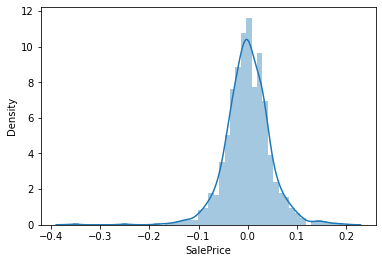

In [607]:
sns.distplot(res)

#### Checking for patterns in the residuals

<AxesSubplot:xlabel='SalePrice'>

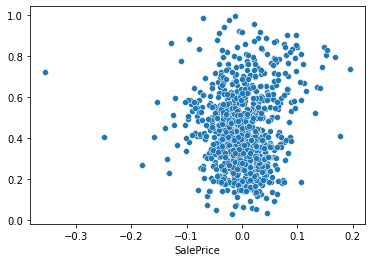

In [608]:
sns.scatterplot( y=predict_train, x=res,hue=None)

#### Inference 
- The error terms are following a normal distribution
- The error terms are centrerd around 0
- The error terms are not following any pattern

### Model Evaluation

In [609]:
predict_train = model_lasso.predict(X_train)
predict_test = model_lasso.predict(X_test)
print("the R2 for train dataset is ",r2_score(y_train,predict_train))
print("the R2 for test dataset is ",r2_score(y_test,predict_test))

the R2 for train dataset is  0.9418553683259715
the R2 for test dataset is  0.8577340047729458


In [610]:
mape = mean_absolute_percentage_error(y_test, predict_test)
mse = mean_squared_error(y_true=y_test, y_pred = predict_test, squared=True)
rmse = mean_squared_error(y_true=y_test, y_pred = predict_test, squared=False)
print('in the test data , we observe that the MAPE : {:.6f}'.format(mape))
print('in the test data , we observe that the MSE: {:.6f}'.format(mse))
print('in the test data , we observe that the RMSE: {:.6f}'.format(rmse))

in the test data , we observe that the MAPE : 0.353683
in the test data , we observe that the MSE: 0.005724
in the test data , we observe that the RMSE: 0.075656


In [611]:
set(feature_importance_lasso[0][:10])

{'1stFlrSF',
 'BsmtFinSF1',
 'Condition2PosA',
 'GarageArea',
 'GrLivArea',
 'LotArea',
 'OverallQual8',
 'OverallQual9',
 'TotalBsmtSF',
 'YearBuilt'}

####  Inference 
- We see that all the evaluation metrics MSE ehich is mean Ssquared error , MAPE & RMSE falls within the 
  acceptable range
- The train R2 lies around .95 and the test R2 is around .85. This says that ~85%  variance in the target variable is being    explained by the independent variables in the model
- The features with highest importance are following are printed above.
